# MNIST Image Classification

_Author: Mill Liao_

_Linkedin: https://www.linkedin.com/in/mill-liao_

_Email: mill.ct.liao@gmail.com_

---

# Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

## Dataset description
The dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The labels of the first 2,000 test examples are given, you will analyse the performance of your proposed method by exploiting the 2,000 test examples. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose. <br />
Here are examples illustrating sample of the dataset (each class takes one row):

<img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:<br />
0 T-shirt/Top<br />
1 Trouser<br />
2 Pullover<br />
3 Dress<br />
4 Coat<br />
5 Sandal<br />
6 Shirt<br />
7 Sneaker<br />
8 Bag<br />
9 Ankle boot <br />

### How to load the data
There is a Input folder including 4 main files (which can be downloaded from Canvas):
    1. images_training.h5 (30000 samples for training)
    2. labels_training.h5
    3. images_testing.h5 (5000 samples for testing)
    4. labels_testing_2000.h5

To read the hdf5 file and load the data into a numpy array, assuming the **training data files are in the ./Input/train** and **testing data file are in ./Input/test**. <br /> Use the following code:

Then data would be a numpy array of the shape (30000, 784), and
label would be a numpy array of the shape (30000, ). It is noted that the labels_testing_2000 only contain 2000 samples for your testing and fine-tuning parameters. We will evaluate your model on full 5000 samples which is not provided.  
The file images_testing.h5 can be loaded in a similar way.

In [251]:
import h5py
import numpy as np
import os
import scipy
import matplotlib.pyplot as pl
from numpy.random import shuffle
import matplotlib as mpl
from ipywidgets import fixed, interactive, interact
import ipywidgets as widgets
from IPython.display import display
import math

print(os.listdir("./Input/train"))

['images_training.h5', 'labels_training.h5']


In [76]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
with h5py.File('./Input/train/images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('./Input/train/labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])
with h5py.File('./Input/test/images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])[:2000,:]
with h5py.File('./Input/test/labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])
    
# using H['datatest'], H['labeltest'] for test dataset.
print('Dimension of Train Data: ',data_train.shape,'Dimension of Train Data Label: ',label_train.shape)
print('Dimension of Test Data: ',data_test.shape,'Dimension of Test Data Label: ',label_test.shape)

Dimension of Train Data:  (30000, 784) Dimension of Train Data Label:  (30000,)
Dimension of Test Data:  (2000, 784) Dimension of Test Data Label:  (2000,)


Showing a sample data. The first example belongs to class 0: T-Shirt/Top

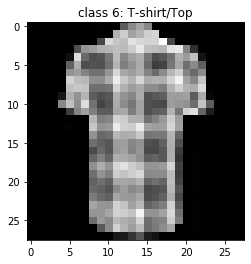

In [4]:
data_train = data_train.reshape((data_train.shape[0], 28, 28))
plt.imshow(data_train[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(label_train[0]) + ": T-shirt/Top" )
plt.show()

In [5]:
data_train = data_train.reshape((data_train.shape[0],-1))
print(data_train.shape)

(30000, 784)


### SVD

In [273]:
def svd_image(idx_image,n_components):
    
    image = data_train[idx_image]
    image = image.reshape((28, 28))

    U, s, Vt = np.linalg.svd(image, full_matrices=False)
    S = np.diag(s)

    image_hat_reconstructed = U[0:U.shape[0], 0:n_components]\
       .dot(S[0:n_components,0:n_components])\
       .dot(Vt[0:n_components, 0:Vt.shape[1]])
    
    SSE = np.sum((image - image_hat_reconstructed)**2) 
    comp_ratio = (image.shape[1]*n_components + n_components + image.shape[0]*n_components)/(image.shape[1] * image.shape[0])
    
    print('If we choose {} dominant singular value/s;\n SSE = {} and\n compresion ratio = {}\n\n'\
      .format(n_components, SSE, np.round(comp_ratio,10)))
    
    pl.figure(figsize=(9,6)) 
    pl.subplot(121)
    pl.imshow(image, cmap=pl.cm.gray)
    pl.title('Original image')
    pl.subplot(122)
    pl.imshow(image_hat_reconstructed, cmap=pl.cm.gray)
    pl.title('Compressed image')
    pl.show()
    
    return image_hat_reconstructed

In [246]:
def svd_transformation(idx_image,n_components):
    
    image = data_train[idx_image]
    image = image.reshape((28, 28))

    U, s, Vt = np.linalg.svd(image, full_matrices=False)
    S = np.diag(s)

    image_hat_reconstructed = U[0:U.shape[0], 0:n_components]\
       .dot(S[0:n_components,0:n_components])\
       .dot(Vt[0:n_components, 0:Vt.shape[1]])
    
    return image_hat_reconstructed

In [247]:
svd_reconstructed_train_data = []
n = 10

for i in range(data_train.shape[0]):
    
    recontructed_data = svd_transformation(i,n_components=n)
    svd_reconstructed_train_data.append(recontructed_data)
    
svd_reconstructed_train_data = np.array(svd_reconstructed_train_data)

In [248]:
svd_reconstructed_train_data

array([[[ 6.7561783e-16,  1.0698599e-16,  4.6179029e-18, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 2.4907312e-18,  2.9461548e-16, -1.0109734e-16, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 3.3202586e-17,  1.2898751e-16,  2.4144542e-18, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 1.2570771e-17,  2.0631941e-16,  2.0513633e-16, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-9.0117198e-17,  1.7412027e-16,  1.1347932e-16, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 1.9447863e-16,  4.3389822e-17, -6.1106516e-18, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 7.5046547e-16,  1.2263406e-17,  1.9101046e-16, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 8.7867598e-17,  1.4716210e-17,  5.9342816e-16, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-3.3153799e-17, 

If we choose 10 dominant singular value/s;
 SSE = 0.24151600897312164 and
 compresion ratio = 0.7270408163




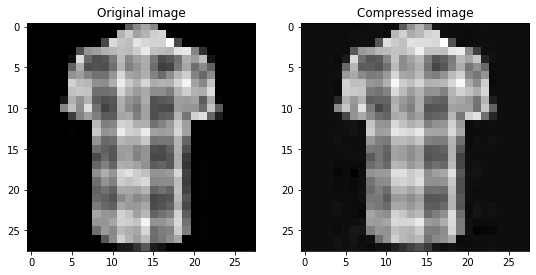

array([[ 6.7561783e-16,  1.0698599e-16,  4.6179029e-18,  8.1203421e-17,
        -7.2588283e-03,  2.0586960e-03, -4.1559339e-03, -2.7953065e-03,
         6.8538273e-03,  4.8240200e-03, -6.2746340e-03,  5.9970329e-03,
         3.2102460e-01,  5.3747755e-01,  6.8752122e-01,  4.9794957e-01,
         2.9458562e-02,  5.0407159e-04, -2.0303498e-03, -3.4095123e-03,
         6.9450014e-03,  2.2149717e-03,  3.5844743e-03, -5.2355318e-03,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.4907312e-18,  2.9461548e-16, -1.0109734e-16,  3.4195599e-16,
         1.6458066e-03, -3.5211064e-03,  8.6771762e-03,  4.2973161e-03,
         1.8006862e-03,  3.3532588e-03, -7.9782158e-03,  6.9971055e-01,
         7.9765642e-01,  6.4672184e-01,  6.9906116e-01,  8.0888885e-01,
         8.3545673e-01,  7.6515079e-03,  9.2706172e-04, -3.1385187e-03,
        -4.8688091e-03,  3.2125143e-03,  2.1942742e-03, -2.3981882e-03,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000

In [274]:
svd_image(0,10)

### PCA

In [276]:
def PCA(n_components, data):
    mean_vec = np.mean(data,axis=0) # Find the mean of each row
    std_vec = data - mean_vec # Standardisation
    covMatrix = np.cov(std_vec, rowvar = False) # Covariance matrix of row
    eig_val, eig_vec = np.linalg.eig(np.mat(covMatrix))
    eig_vec = eig_vec[:,np.argsort(-eig_val)][:n_components,:] # Sort the eigenvector by eigenvalue
    eig_vall = -np.sort(-eig_val)[:n_components] # Sort the eigenvalue
    data_pca = std_vec.dot(eig_vec.T) # Mapping the original data into new space
    return data_pca, eig_val, eig_vec

In [277]:
pca_train, eVal_train, eVec_train = PCA(200, data_train)

In [264]:
pca_test, eVal_test, eVec_test = PCA(200, data_test)

In [124]:
print(pca_train.shape)
print(pca_test.shape)

(30000, 200)
(2000, 200)


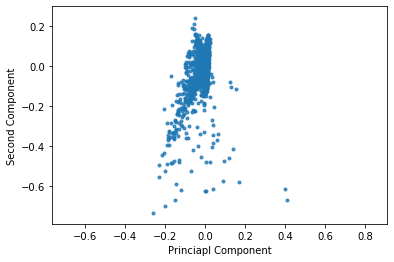

In [280]:
pl.scatter([pca_train[:,0]],[pca_train[:,1]],alpha=0.8,marker='.')
pl.axis('equal')
pl.xlabel('Princiapl Component')
pl.ylabel('Second Component')
pl.show()

### KNN

In [60]:
def KNN(test, train, train_label, k):
    
    # Copy the testing data, and then caculate the difference between testing and training data
    difference = np.tile(test,(train.shape[0],1)) - train 
    euclidean_dist = (difference ** 2).sum(axis=1)**0.5 # Caculate Euclidean distance
    sort_dist = euclidean_dist.argsort() # Sort the index based on Euclidean distance from the near to the distant
    
    vote = {}
    for i in range(k): # Observe K Nearest Neighbours from the near to the distant
        label = train_label[sort_dist[i]] # Extract the index of the nearest point and then find the label of that training data
        vote[label] = vote.get(label,0) + 1 # Start to vote!!!
    sort_vote = sorted(vote.items(), key=lambda item:item[1], reverse=True) # Sort the vote result
    elected = sort_vote[0][0]
    return elected

In [63]:
def KNN_pred(k):
    KNN_pred_label = [] 
    for i in range(data_test.shape[0]): # Review all testing data

        predict = KNN(data_test[i],data_train,label_train,k) # Implement KNN to get the predicted label
        KNN_pred_label.append(predict)

    return KNN_pred_label

In [58]:
def accuracy(pred_label,actual_label): # Caculate the accuracy
    correct_pred = 0
    for i in range(actual_label.shape[0]):
        if pred_label[i] == actual_label[i]: # Prediected label = Actual label
            correct_pred = correct_pred + 1 
 
    accuracy = correct_pred/float(actual_label.shape[0]) # accuracy = Correct labels/All labels
    return accuracy

In [64]:
KNN_pred_5 = KNN_pred(5)
KNN_pred_11 = KNN_pred(11)
KNN_pred_15 = KNN_pred(15)
KNN_pred_21 = KNN_pred(21)

In [66]:
KNN_acc_5 = accuracy(KNN_pred_5,label_test)
KNN_acc_11 = accuracy(KNN_pred_11,label_test)
KNN_acc_15 = accuracy(KNN_pred_15,label_test)
KNN_acc_21 = accuracy(KNN_pred_21,label_test)
print('The accuracy of KNN (K=5): ',KNN_acc_5)
print('The accuracy of KNN (K=11): ',KNN_acc_11)
print('The accuracy of KNN (K=15): ',KNN_acc_15)
print('The accuracy of KNN (K=21): ',KNN_acc_21)

The accuracy of KNN (K=5):  0.8265
The accuracy of KNN (K=11):  0.832
The accuracy of KNN (K=15):  0.8215
The accuracy of KNN (K=21):  0.8265


In [257]:
KNN_pred_7 = KNN_pred(7)
KNN_acc_7 = accuracy(KNN_pred_7,label_test)
print('The accuracy of KNN (K=7): ',KNN_acc_7)

The accuracy of KNN (K=7):  0.832


In [258]:
KNN_pred_13 = KNN_pred(13)
KNN_acc_13 = accuracy(KNN_pred_13,label_test)
print('The accuracy of KNN (K=13): ',KNN_acc_13)

The accuracy of KNN (K=13):  0.8285


In [292]:
tt = [KNN_acc_5,KNN_acc_7,KNN_acc_11,KNN_acc_13,KNN_acc_15,KNN_acc_21]

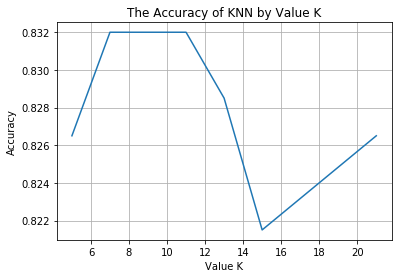

In [295]:

#find a good r_svd
fig, ax = plt.subplots()
ax.plot(ttx,tt)
ax.set_xlabel('Value K')
ax.set_ylabel('Accuracy')
ax.set_title('The Accuracy of KNN by Value K')
plt.grid(True)
plt.show()

### Gaussian Naïve Bayes

In [67]:
def pdf_gaussian_dist(data_point, mean, variance):
    # PDF of Gaussian distribution
    pdf = math.exp(-0.5*((data_point-mean)**2/variance))/(math.sqrt(2*math.pi*variance))                                                      
                                                          
    return pdf

In [68]:
# Caculate Prior probability
total_label = len(label_train)
prior_prob = {}
class_train_data = {}

for i in np.unique(label_train):
    
    i_label = len(data_train[label_train==i]) # Caculate the number of each label
    label_prob = i_label/total_label # Caculate the prior probability of each label 
    prior_prob[i] = label_prob
    class_train_data[i] = data_train[np.where(label_train==i)] # Create new training dataset dictionary based on label
    
print(prior_prob)

{0: 0.10136666666666666, 1: 0.09906666666666666, 2: 0.09786666666666667, 3: 0.10026666666666667, 4: 0.09846666666666666, 5: 0.10096666666666666, 6: 0.10076666666666667, 7: 0.10043333333333333, 8: 0.10133333333333333, 9: 0.09946666666666666}


In [69]:
class_test_data = {}

for i in np.unique(label_test):
    
    class_test_data[i] = data_test[np.where(label_test==i)] # Create new testing dataset dictionary based on label

In [70]:
# Caculate mean and variance of training data
train_mean = {}
train_var = {}

for i in class_train_data.keys(): # For each label
    print(i)
    label_mean = []
    label_var = []
    
    for j in range(class_train_data[i].shape[1]): # For each feature
        
        mean = np.mean(class_train_data[i][:,j]) # Caculate the mean based on label and feature
        var = np.var(class_train_data[i][:,j]) # Caculate the  based on label and feature
        label_mean.append(mean)
        label_var.append(var)
        
    train_mean[i] = label_mean
    train_var[i] = label_var

0
1
2
3
4
5
6
7
8
9


In [71]:
def Naive_Bayes_Classifier(row,data): # data = data_train or data_test

    label_pred = {}

    for label in class_train_data.keys(): # For each label

        cond_prob_collect = []
        for i in range(784): # For each feature
            # Caculate the pdf of gaussain distribution and do smoothing
            pdf = pdf_gaussian_dist(data[row][i],train_mean[label][i],train_var[label][i]+0.0000000000001)
            cond_prob_collect.append(pdf*0.5) # Caculate the conditional probability

        cond_prob = np.prod(cond_prob_collect) # Multiple all conditional probabilities
        label_pred[label] = cond_prob*prior_prob[label] # Multiple conditional probability and prior probability
        pred = max(label_pred, key = label_pred.get) # Find the label with the max posterior probability
        
    return pred

In [77]:
# Naive Bayes classifier for training data
label_pred = []

for i in range(len(data_train)):
    
    pred = Naive_Byes_Classifier(i,data_train)
    label_pred.append(pred)

NB_pred_train = np.array(label_pred)
NB_acc_train = accuracy(NB_pred_train,label_train)
print('The accuracy of Naive Bayes (Train): ',NB_acc_train)

The accuracy of Naive Bayes (Train):  0.5710333333333333


In [78]:
# Naive Bayes classifier for testing data
test_label_pred = []

for i in range(len(data_test)):
    
    pred = Naive_Bayes_Classifier(i,data_test)
    test_label_pred.append(pred)

NB_pred_test = np.array(test_label_pred)
NB_acc_test = accuracy(NB_pred_test,label_test)
print('The accuracy of Naive Bayes (Test): ',NB_acc_test)

The accuracy of Naive Bayes (Test):  0.566


### Multi Logistic Regression

In [79]:
def extend_to_intercept(x): # Add the bisa for data
    return np.hstack((np.ones((x.shape[0],1)), x))

In [80]:
def logistic_loss_and_grad(weights, inputs, targets): # Gradient Disecent and Loss Ffunction for logistic regression

    #derivative of the loss function
    z = np.dot(inputs, weights) 
    exp_z = np.exp(-z)
    temp = 1/(1 + exp_z) - targets
    dloss = np.sum(temp*inputs, axis=0)[:, np.newaxis]

    #calculating the loss
    cost = -(targets*np.log(1/(1+exp_z))+(1-targets)*np.log(1-(1/(1+exp_z))))
    loss = np.sum(cost)/len(inputs)

    return dloss, loss

In [81]:
def logistic_predictions(weights, inputs): # Predict the result
    z = np.dot(inputs, weights)
    h = 1.0/(1.0 + np.exp(-z))
    predict = []
    for i in range(len(h)):
        if h[i] >= 0.5: # If the probabiluty hypothesis >= 0.5 return 1
            predict.append(1)
        elif h[i] < 0.5: # If the probabiluty hypothesis < 0.5 return 0
            predict.append(0)
    return np.array(predict)

In [82]:
train_log = np.concatenate((class_train_data[0],
                            class_train_data[1],
                            class_train_data[2],
                            class_train_data[3],
                            class_train_data[4],
                            class_train_data[5],
                            class_train_data[6],
                            class_train_data[7],
                            class_train_data[8],
                            class_train_data[9],))

In [83]:
train_log = extend_to_intercept(train_log)

In [84]:
test_log = np.concatenate((class_test_data[0],
                           class_test_data[1],
                           class_test_data[2],
                           class_test_data[3],
                           class_test_data[4],
                           class_test_data[5],
                           class_test_data[6],
                           class_test_data[7],
                           class_test_data[8],
                           class_test_data[9],))

In [85]:
test_log = extend_to_intercept(test_log)

In [86]:
train_label_log = np.array([0]*len(class_train_data[0])
                          +[1]*len(class_train_data[1])
                          +[2]*len(class_train_data[2])
                          +[3]*len(class_train_data[3])
                          +[4]*len(class_train_data[4])
                          +[5]*len(class_train_data[5])
                          +[6]*len(class_train_data[6])
                          +[7]*len(class_train_data[7])
                          +[8]*len(class_train_data[8])
                          +[9]*len(class_train_data[9]))

In [87]:
test_label_log = np.array([0]*len(class_test_data[0])
                          +[1]*len(class_test_data[1])
                          +[2]*len(class_test_data[2])
                          +[3]*len(class_test_data[3])
                          +[4]*len(class_test_data[4])
                          +[5]*len(class_test_data[5])
                          +[6]*len(class_test_data[6])
                          +[7]*len(class_test_data[7])
                          +[8]*len(class_test_data[8])
                          +[9]*len(class_test_data[9]))

In [88]:
def label_transform(label,data):
    label_log = data # data = train_label_log or test_label_log
    label_log = np.where(label_log!=label, 10, label_log) 
    label_log = np.where(label_log==label, 1, label_log) 
    label_log = np.where(label_log==10, 0, label_log)
    return label_log

In [89]:
def pred_label_transform(y_pred,label):
    y_pred = np.where(y_pred==0,10,y_pred)
    y_pred = np.where(y_pred==1,label,y_pred)
    return y_pred

In [90]:
def y_data_transform(label,label_log):
    y_data = label_transform(label,label_log)
    y_data = np.where(y_data==0,10,y_data)
    y_data = np.where(y_data==1,0,y_data)
    return y_data

In [119]:
def Multi_Logistic_Regression(label,n_iter,eta): 
    
    label = label
    N, D = train_log.shape
    y = label_transform(label,train_label_log).reshape(train_log.shape[0],1)
    weights = np.random.random(D)[:, np.newaxis]

    eta = eta
    n_iter = n_iter

    for epoch in range(n_iter):

        #gradient descent
        dloss, loss = logistic_loss_and_grad(weights, train_log, y)
        weights = weights  - dloss * eta

    y_pred_train = logistic_predictions(weights, train_log)
    y_pred_train = pred_label_transform(y_pred_train,label)
    
    y_pred_test = logistic_predictions(weights, test_log)
    y_pred_test = pred_label_transform(y_pred_test,label)
    
    y_train_data = y_data_transform(label,train_label_log)
    y_test_data = y_data_transform(label,test_label_log)
    
    train_acc = accuracy(y_pred_train,y_train_data)
    test_acc = accuracy(y_pred_test,y_test_data)

    return train_acc, test_acc, y_pred_train, y_train_data, y_pred_test, y_test_data

In [239]:
train_acc = {}
test_acc = {}
LogReg_pred_train = {}
LogReg_pred_test = {}

LogReg_label_train = {}
LogReg_label_test = {}

for i in range(10):
    
    train_acc_label, test_acc_label, y_pred_train, y_train_data, y_pred_test, y_test_data = Multi_Logistic_Regression(i,300,0.05)
    
    train_acc[i] = train_acc_label
    test_acc[i] = test_acc_label
    
    LogReg_pred_train[i] = y_pred_train
    LogReg_pred_test[i] = y_pred_test
    
    LogReg_label_train[i] = y_train_data
    LogReg_label_test[i] = y_test_data
    
MultiLog_acc_train = sum(train_acc.values())/len(train_acc)
MultiLog_acc_test = sum(test_acc.values())/len(test_acc)
print('The accuracy of Logistic Regression (Train): ',MultiLog_acc_train) # Individual classifier to class different label
print('The accuracy of Logistic Regression (Test): ',MultiLog_acc_test)

The accuracy of Logistic Regression (Train):  0.8912666666666667
The accuracy of Logistic Regression (Test):  0.8899500000000001


In [298]:
train_acc

{0: 0.9583,
 1: 0.8962666666666667,
 2: 0.8671666666666666,
 3: 0.8493,
 4: 0.8994333333333333,
 5: 0.8980333333333334,
 6: 0.8992333333333333,
 7: 0.8901333333333333,
 8: 0.8916,
 9: 0.8632}

In [299]:
test_acc

{0: 0.9595,
 1: 0.9035,
 2: 0.8615,
 3: 0.8425,
 4: 0.8875,
 5: 0.9035,
 6: 0.905,
 7: 0.895,
 8: 0.8765,
 9: 0.865}

In [265]:
empty_arr_train = np.array([10]*30000)
for i in range(10):
    empty_arr_train[LogReg_label_train[i]==0] = i

sort_idx = sorted(train_acc.items(),key=lambda item:item[1])
train_arr = np.array([10]*30000)
for i in range(10):
    idx = sort_idx[i][0]
    train_arr[LogReg_pred_train[idx]==idx] = idx
    
for i in range(len(train_arr)):
    if train_arr[i] == 10:
        train_arr[i] = randint(0,9)
MultiLog_acc_train_all = accuracy(train_arr,empty_arr_train)

In [266]:
empty_arr = np.array([10]*2000)
for i in range(10):
    empty_arr[LogReg_label_test[i]==0] = i

sort_idx = sorted(test_acc.items(),key=lambda item:item[1])
test_arr = np.array([10]*2000)
for i in range(10):
    idx = sort_idx[i][0]
    test_arr[LogReg_pred_test[idx]==idx] = idx
    
for i in range(len(test_arr)):
    if test_arr[i] == 10:
        test_arr[i] = randint(0,9)
MultiLog_acc_test_all = accuracy(test_arr,empty_arr)

In [267]:
print('The accuracy of Logistic Regression (Train-overall): ',MultiLog_acc_train_all)
print('The accuracy of Logistic Regression (Test-overall): ',MultiLog_acc_test_all)

The accuracy of Logistic Regression (Train-overall):  0.7132666666666667
The accuracy of Logistic Regression (Test-overall):  0.704


### Algorithm Comparison

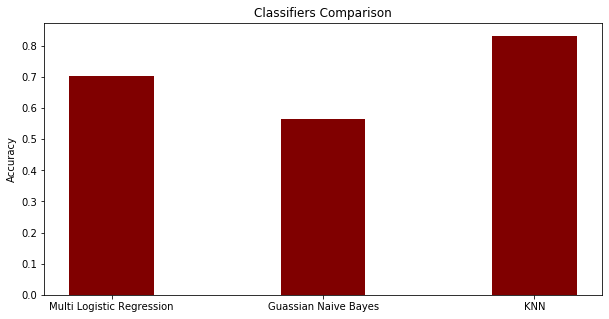

In [272]:
data = {'Multi Logistic Regression':MultiLog_acc_test_all, 'Guassian Naive Bayes':NB_acc_test, 'KNN':KNN_acc_7} 
classifier = list(data.keys()) 
accuracy = list(data.values()) 
   
fig = pl.figure(figsize = (10, 5)) 
  
pl.bar(classifier, accuracy, color ='maroon',  width = 0.4) 
  
pl.ylabel("Accuracy") 
pl.title("Classifiers Comparison") 
pl.show() 

### Output the prediction
Output a file “predicted_labels.h5” that can be loaded in the same way as above. You may use the following code to generate an output file that meets the requirement:

In [271]:
import numpy as np
with h5py.File('predicted_labels.h5','w') as H:
    H.create_dataset('Output',data=KNN_acc_7)

We will load the output file using the code for loading data above. It is your responsibility to make sure the output file can be correctly loaded using this code.
The performance of your classifier will be evaluated in terms of the top-1 accuracy metric, i.e.<br /><br />
<div style="text-align: center"> $$\text{Accuracy} = \frac{\text{Number of correct classifications}}{\text{Total number of test examples used}} * 100\%$$